### Guided Project 2: Exchange Rates

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

Daria Chemkaeva put together the data set and made it available on <a href ='https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020'> Kaggle </a> — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-05-06               1.5547           1.9558            6.4707   
1   2021-05-05               1.5510           1.9558            6.5174   
2   2021-05-04               1.5608           1.9558            6.5785   
3   2021-05-03               1.5573           1.9558            6.5507   
4   2021-04-30               1.5581           1.9558            6.4597   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.4764         1.0953                   7.8054              NaN   
1             1.4731         1.0965                   7.7636              NaN   
2             1.4836         1.0980                   7.8136              NaN   
3             1.4807         1.1016                   7.7967              NaN   
4             1.4834         1.0998                   7.8134              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

### Data Cleaning

* We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
* We change the Time column to a datetime data type.
* We sort the values by Time in ascending order.
* We reset the index (and drop the initial index).


In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.2378     1
1.4538     1
1.5020     1
1.0845     1
1.3052     1
Name: US_dollar, Length: 3549, dtype: int64

In [5]:
#Drop all the rows where the - character appears in the US_dollar column.

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [7]:
#Convert the data type from int64 to float

In [8]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [9]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5719 non-null   datetime64[ns]
 1   US_dollar  5719 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.0 KB


In [10]:
%matplotlib inline 

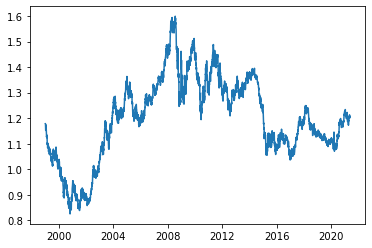

In [11]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

We will use a 30-day rolling mean to calculate the moving average of the exchange rate (EUR-USD)

In [12]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

In [13]:
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5776,2021-04-30,1.2082,1.192843
5777,2021-05-03,1.2044,1.193283
5778,2021-05-04,1.2021,1.193717
5779,2021-05-05,1.2005,1.193980


### Coming Up With An Idea 

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. 
* We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008's financial crisis. 
* We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In this project, how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In [14]:
bush_obama_trump = euro_to_dollar.copy(
                    )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]

bush = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year < 2009)]

obama = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]

trump = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

Below, you'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more flexibility in arranging the subplots:

We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

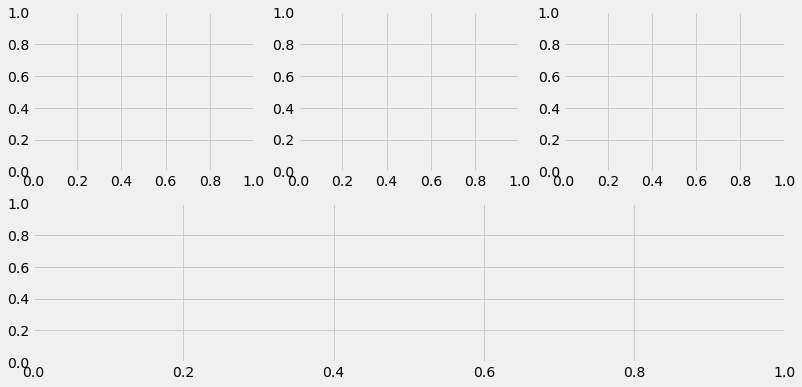

In [34]:
#Import Style 
import matplotlib.style as style
style.use('fivethirtyeight')

#Create plots
plt.figure(figsize = (12, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)

axes = [ax1, ax2, ax3, ax4]

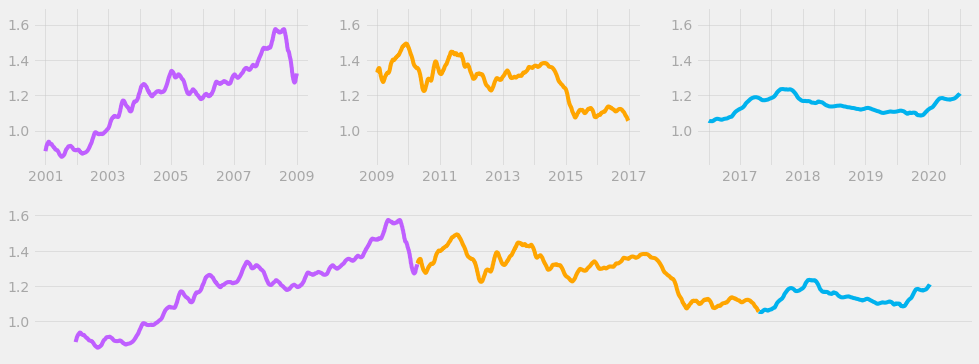

In [48]:
#Import Style 
import matplotlib.style as style
style.use('fivethirtyeight')

#Create plots
plt.figure(figsize = (15, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)

axes = [ax1, ax2, ax3, ax4]

for ax in axes: 
    ax.set_ylim(0.8, 1.7) 
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    
#Hashing all texts as inserting Texts resulted in pixel size limitation

#Ax1: Bush 

ax1.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax1.set_xticklabels(['','2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)

#ax1.text(12300, 1.92, 'BUSH', size=18, weight='bold', color='#BF5FFF')
#ax1.text(12000, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

#Ax2: Obama

ax2.plot(obama['Time'], obama['rolling_mean'], color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha = 0.3)

#ax2.text(15100, 1.92, 'OBAMA', size=18, weight='bold', color='#ffa500')
#ax2.text(14800, 1.92, '(2009-2017)', weight='bold', alpha=0.3)

#Ax3: Trump

ax3.plot(trump['Time'],trump['rolling_mean'], color='#00B2EE')
ax3.set_xticklabels(['', '2017', '', '2018', '','2019', '', '2020', '', '2021'], alpha=0.3)

#ax3.text(18100, 1.92, 'TRUMP', size=18, weight='bold', color='#00B2EE')
#ax3.text(17800, 1.92, '(2017-2021)', weight='bold', alpha=0.3)

### Ax4: Bush-Obama-Trump

ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])


## Adding Title to the Plot 

#ax1.text(10800, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         #fontsize=20, weight='bold')
#ax1.text(10800, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
#and Donald Trump (2017-2021)''',
        #fontsize=16)

# Adding a signature
#ax4.text(10700, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        #color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        #size=14)

plt.show()

In [17]:
## NEED TO ADJUST PIXEL 